In [2]:
using FileIO
using NCDatasets
using PyPlot
using LaTeXStrings
using MixedLayerModel

In [3]:
path = "../experiments/output/";
out400 = load(path*"co2_400.jld2");

co2_vals = [500,600,700,800];
exps = path*"co2_upstep_".*string.(co2_vals).*".jld2";
exps_fixSST = path*"co2_upstep_fixSST_".*string.(co2_vals).*".jld2";

out = load.(exps);
out_fixSST = load.(exps_fixSST);

p = basic_params();

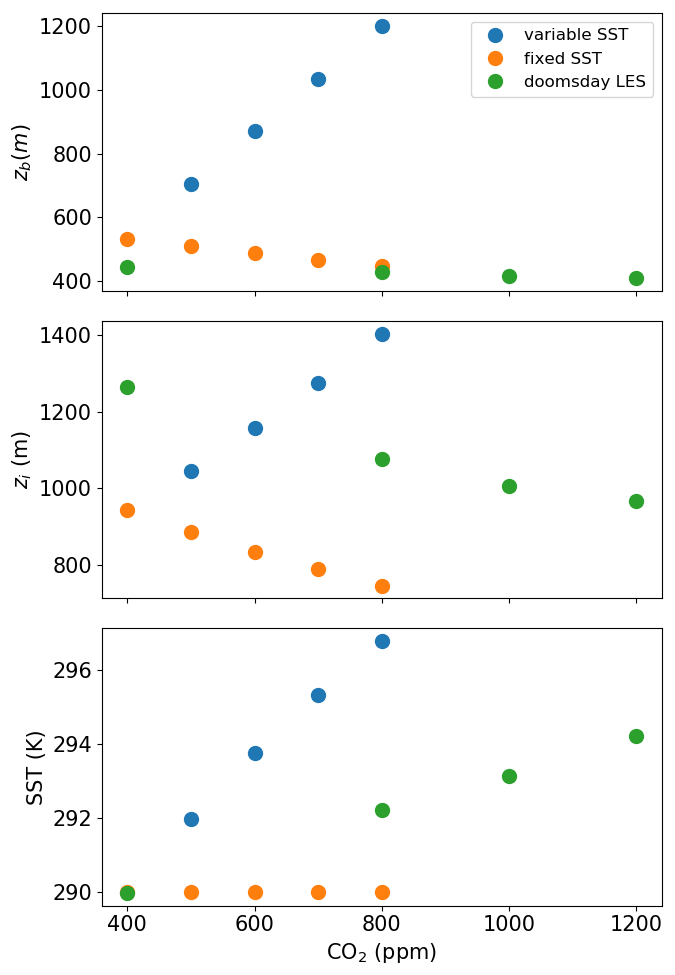

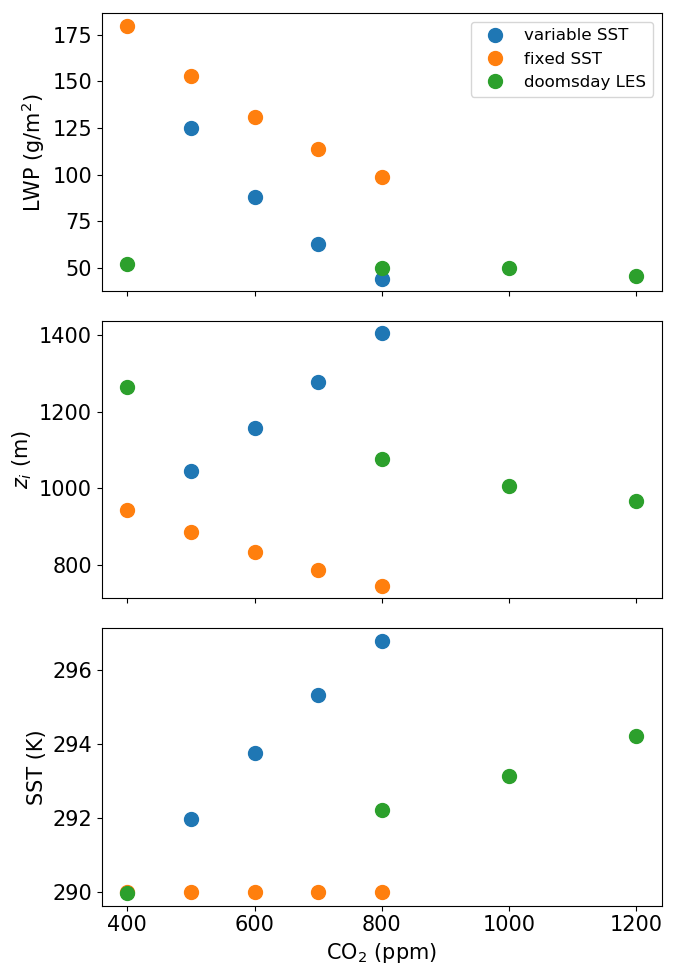

In [52]:
compare("zb", out400, out, out_fixSST)
compare("lwp", out400, out, out_fixSST)

In [51]:
function compare(var, out400, out, out_fixSST)
    rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams");
    rcParams["font.size"] = 15;

    fig, axes = subplots(3,1, figsize=(7,10), sharex=true);
    ax1, ax2, ax3 = axes;

    u = out400["uf"];
    zi, hM, qM, SST = u;
    
    zb = calc_LCL(zi, hM, qM);
    lwp = calc_LWP(zi, hM, qM) * 1e3;
    if var == "zb"
        x = zb
    elseif var == "lwp"
        x = lwp
    end
    
    ax1.plot(400.0, x, "o", color="C1", markersize=10.0)
    ax2.plot(400.0, zi, "o", color="C1", markersize=10.0)
    ax3.plot(400.0, SST, "o", color="C1", markersize=10.0)
    
    p1,p2,p3 = 0,0,0;

    for (i,o) in enumerate(out)  
        u = o["uf"];
        co2i = co2_vals[i];
        zi, hM, qM, SST = u;
        
        zb = calc_LCL(zi, hM, qM);
        lwp = calc_LWP(zi, hM, qM) * 1000;
        if var == "zb"
            x = zb
        elseif var == "lwp"
            x = lwp
        end
        
        p1, = ax1.plot(co2i, x, "o", color="C0", markersize=10.0)
        ax2.plot(co2i, zi, "o", color="C0", markersize=10.0)
        ax3.plot(co2i, SST, "o", color="C0", markersize=10.0)

        u = out_fixSST[i]["uf"];
        co2i = co2_vals[i];
        zi, hM, qM, SST = u;
        
        zb = calc_LCL(zi, hM, qM);
        lwp = calc_LWP(zi, hM, qM) * 1000;
        if var == "zb"
            x = zb
        elseif var == "lwp"
            x = lwp
        end
        
        p2, = ax1.plot(co2i, x, "o", color="C1", markersize=10.0)
        ax2.plot(co2i, zi, "o", color="C1", markersize=10.0)
        ax3.plot(co2i, SST, "o", color="C1", markersize=10.0)
    end

    ds = Dataset("LES_steadystate_all_upsteps.nc")
    max = 4
    co2 = ds["CO2"][1:max]
    zb = ds["zb"][1:max]
    lwp = ds["lwp"][1:max]*1e3
    sst = ds["sst"][1:max]
    zi = ds["zi"][1:max]
    if var == "zb"
        x = zb
    elseif var == "lwp"
        x = lwp
    end
    
    p3, = ax1.plot(co2,x,"o",color="C2",markersize=10.0)
    ax2.plot(co2,zi,"o",color="C2",markersize=10.0)
    ax3.plot(co2,sst,"o",color="C2",markersize=10.0)
    
    if var == "zb"
        ax1.set_ylabel(L"z_b (m)");
    elseif var == "lwp"
        ax1.set_ylabel(L"LWP (g/m$^2$)");
    end
    ax2.set_ylabel(L"$z_i$ (m)"); ax3.set_ylabel("SST (K)");
    ax3.set_xlabel(L"CO$_2$ (ppm)"); 
    tight_layout();
    ax1.legend([p1,p2,p3],["variable SST","fixed SST","doomsday LES"], fontsize=12);
    
    if var == "zb"
        savefig("./figures/zb_zi_sst_co2.png",dpi=400);
    elseif var == "lwp"
        savefig("./figures/lwp_zi_sst_co2.png",dpi=400);
    end
    show();
end

compare (generic function with 2 methods)